### Three Stages of ChatGPT
- **Pre Trained Model** : is was trained on indiscriminate data , clickbit, misinformation, propogamnda -
Pre trained model optimize for completion
- **The Supervised Fine-tuned Model**: This monster was then fine tuned on higher quality data - Think like StackOverflow, Quora , or human annotations - which makes it socially acceptable. - The goal of SFT is to optimize pretrianed model to generate the response that users want. Using the Demonstration data.
- **RLHF**: The Fine-tuned model then further polished using RLHF to make it smily.

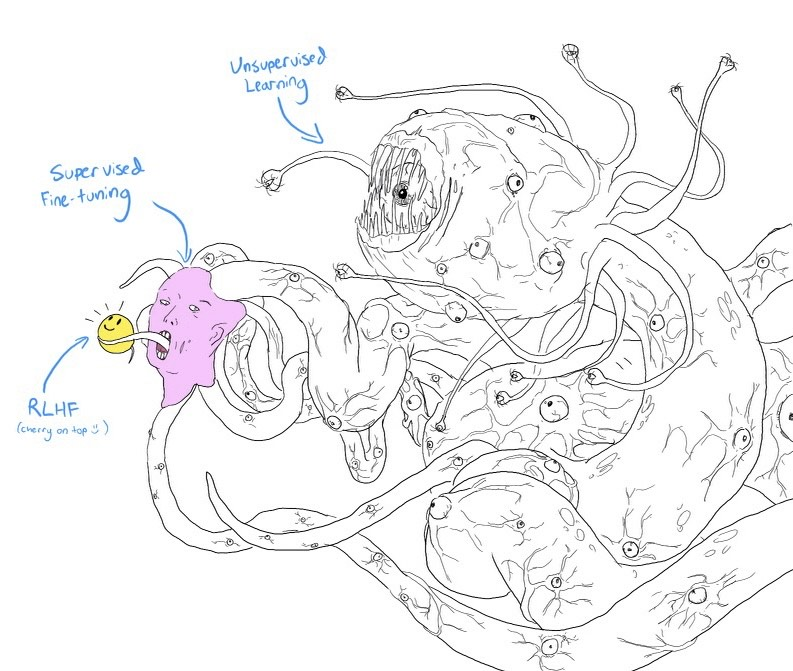

- **Token** : You can think of tokens as the vocabulary that a lanhguage model uses.

- Internet is being rapidly populated with data generated by large language models like ChatGPT.
- If companies continue using Internet data to train large LLMs, these LLMs might just be trained on data generated by exisiting LLMs 

- " We expect RL based human feedback (RLHF) to have the largest compratative advantage over other techniques when people have complex intuitions that are easy to elicit but difficult to formalize adn automate"
- 
- **Iterative improvements from feedback** appears as a universal principle, e.g gradient descent in optimization, temporal difference learning in AI, policy iteration in dynamic programming.
  
- AI adapts to humans, not vice versa.

- RL is a promising framework to learn from feedback and for adaptive control, and thus to advance language models.
  
- **Policy** is mapping from an observation to actions.
  
-  A language model is about the probability distri-bution of a sequence of tokens. In CHATGPT and many LMs, an auto-regressive language model is the probaility distributaion of next token.

- Probability (next token|previous tokens)

## RHFL consists of two parts:

1. Train a reward model to act as a scoring function
2. Optimize LLM to generate responses for which the reward model will give high scores  

- Side Note: Dialouges are flexible, given a prompt, there are many plausible resposnses, some are better than other. Demonstration Data tells the model what resposnses are plausible for given context, but does not tell the model how good or bad resposnse is.

### Part A) How the Reward Model Works:

- $r_{\theta}(x,y)$ : The reward model being trained, parametrized by $\theta$. The goal of the trained process is to find $\theta$ for which the loss is minimized.
- Training data:
- $x$: prompt
- $y_w$: winning response
- $y_l$: losing response
- For each training sample, $(x,y_w,y_l)$:
- $s_w= r_{\theta}(x, y_w)$: reward models score for the winning score
- $s_l = r_{\theta}(x, y_l)$: reward models score for the losing score
- Loss value: $-log(\sigma(s_w-s_l))$
- Goal is to minimize $-E_{x} log(\sigma(s_w-s_l))$

### Important point
- The Reward Model (RM) aims to align models to the **human preference**.
- Why **InstructGPT(SFT + RLHF) outperform SFT alone**
- Generally speaking, successful RLHF training requires an accurate reward model as a surrogate for human judgment
- And PPO algorithm for robust policy optimization.

#### RL in ChatGPT
- Applying **RL** to dialoug generation:
- **Environmnet**: human interaction as the "environmnet"
- **State**: receives a state $s_t$ from the environmnet (i.e, the dialoug history), which consists of all the dialoug text up to this point (both by the assistant adn the human)
- **Action**: Based on its policy $\pi$, the agent's action $a_t$ is to generate the next token.
- **Reward**: The environmnet returns a reward $r(s_t,a_t)$, which is calculated from a reward function trained from human preference data.
- The aim of RL is to find an optimal behaviour strategy for agent to maximize the cumulative reward
- $$\tau = \{s_1, a_1, \cdots, s_T, a_T\}$$


### Policy gradient methods
- The update rule for the policy gradient is given as:
- $$\theta \leftarrow \theta + \alpha \nabla_{\theta} J(\theta)$$

In [27]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.dpi"] = 200

In [35]:
#d = s_w -s_l

def loss_func(d):
    
    sigmoid_d = 1/(1+np.exp(-d))
    
    return -np.log10(sigmoid_d) 

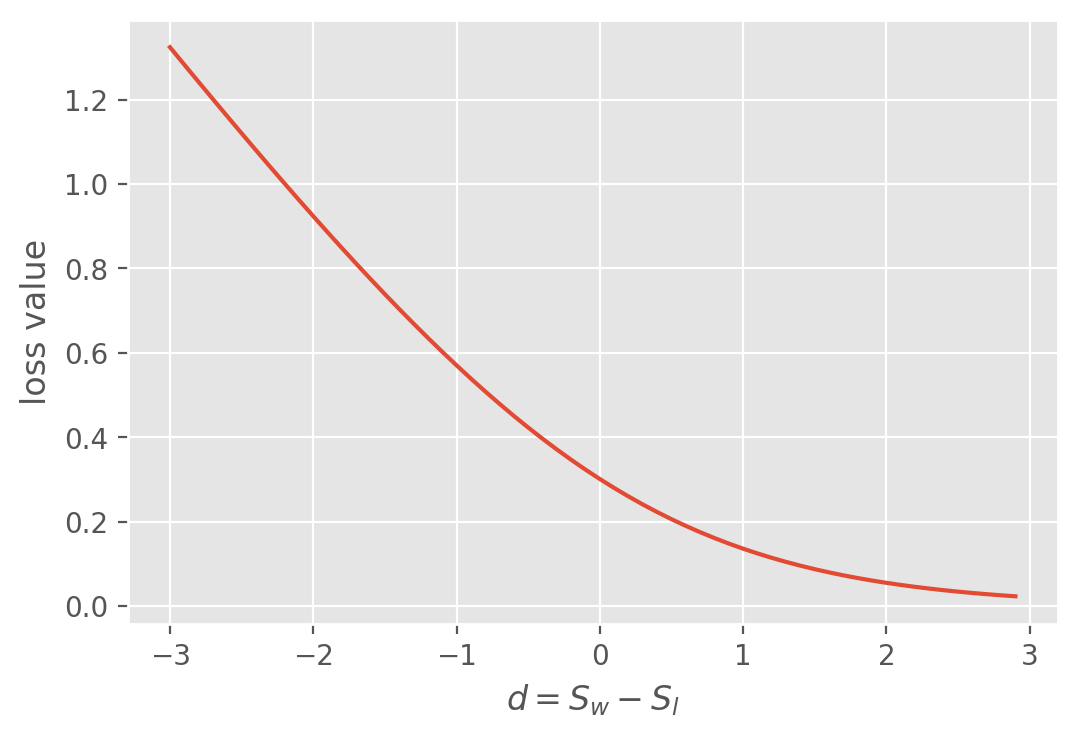

In [43]:
d = np.arange(-3,3,0.1)
loss_func_array=loss_func(d)


plt.plot(d, loss_func_array)
plt.xlabel(r'$d=S_w-S_l$')
plt.ylabel("loss value")
plt.show()
